In [1]:
import warnings
warnings.filterwarnings('ignore')

# Import 'numpy' and 'pandas' for working with numbers and data frames
import numpy as np
import pandas as pd

# Import 'pyplot' from 'matplotlib' and 'seaborn' for visualizations
from matplotlib import pyplot as plt
import seaborn as sns

# Import method for regression from 'statsmodels'
import statsmodels.formula.api as smf

# Import methods for regression diagnostic plots from 'statsmodels'
from statsmodels.api import ProbPlot, qqplot

Importing the Dataset

In [68]:
df = pd.read_csv('day.csv' , index_col = 'instant')
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,
1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 730 entries, 1 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  casual      730 non-null    int64  
 13  registered  730 non-null    int64  
 14  cnt         730 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 91.2+ KB


In [4]:
df.shape

(730, 15)

In [62]:
df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [63]:
df.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

In [69]:
df = df[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt']]

In [65]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt'],
      dtype='object')

visualizing the data 

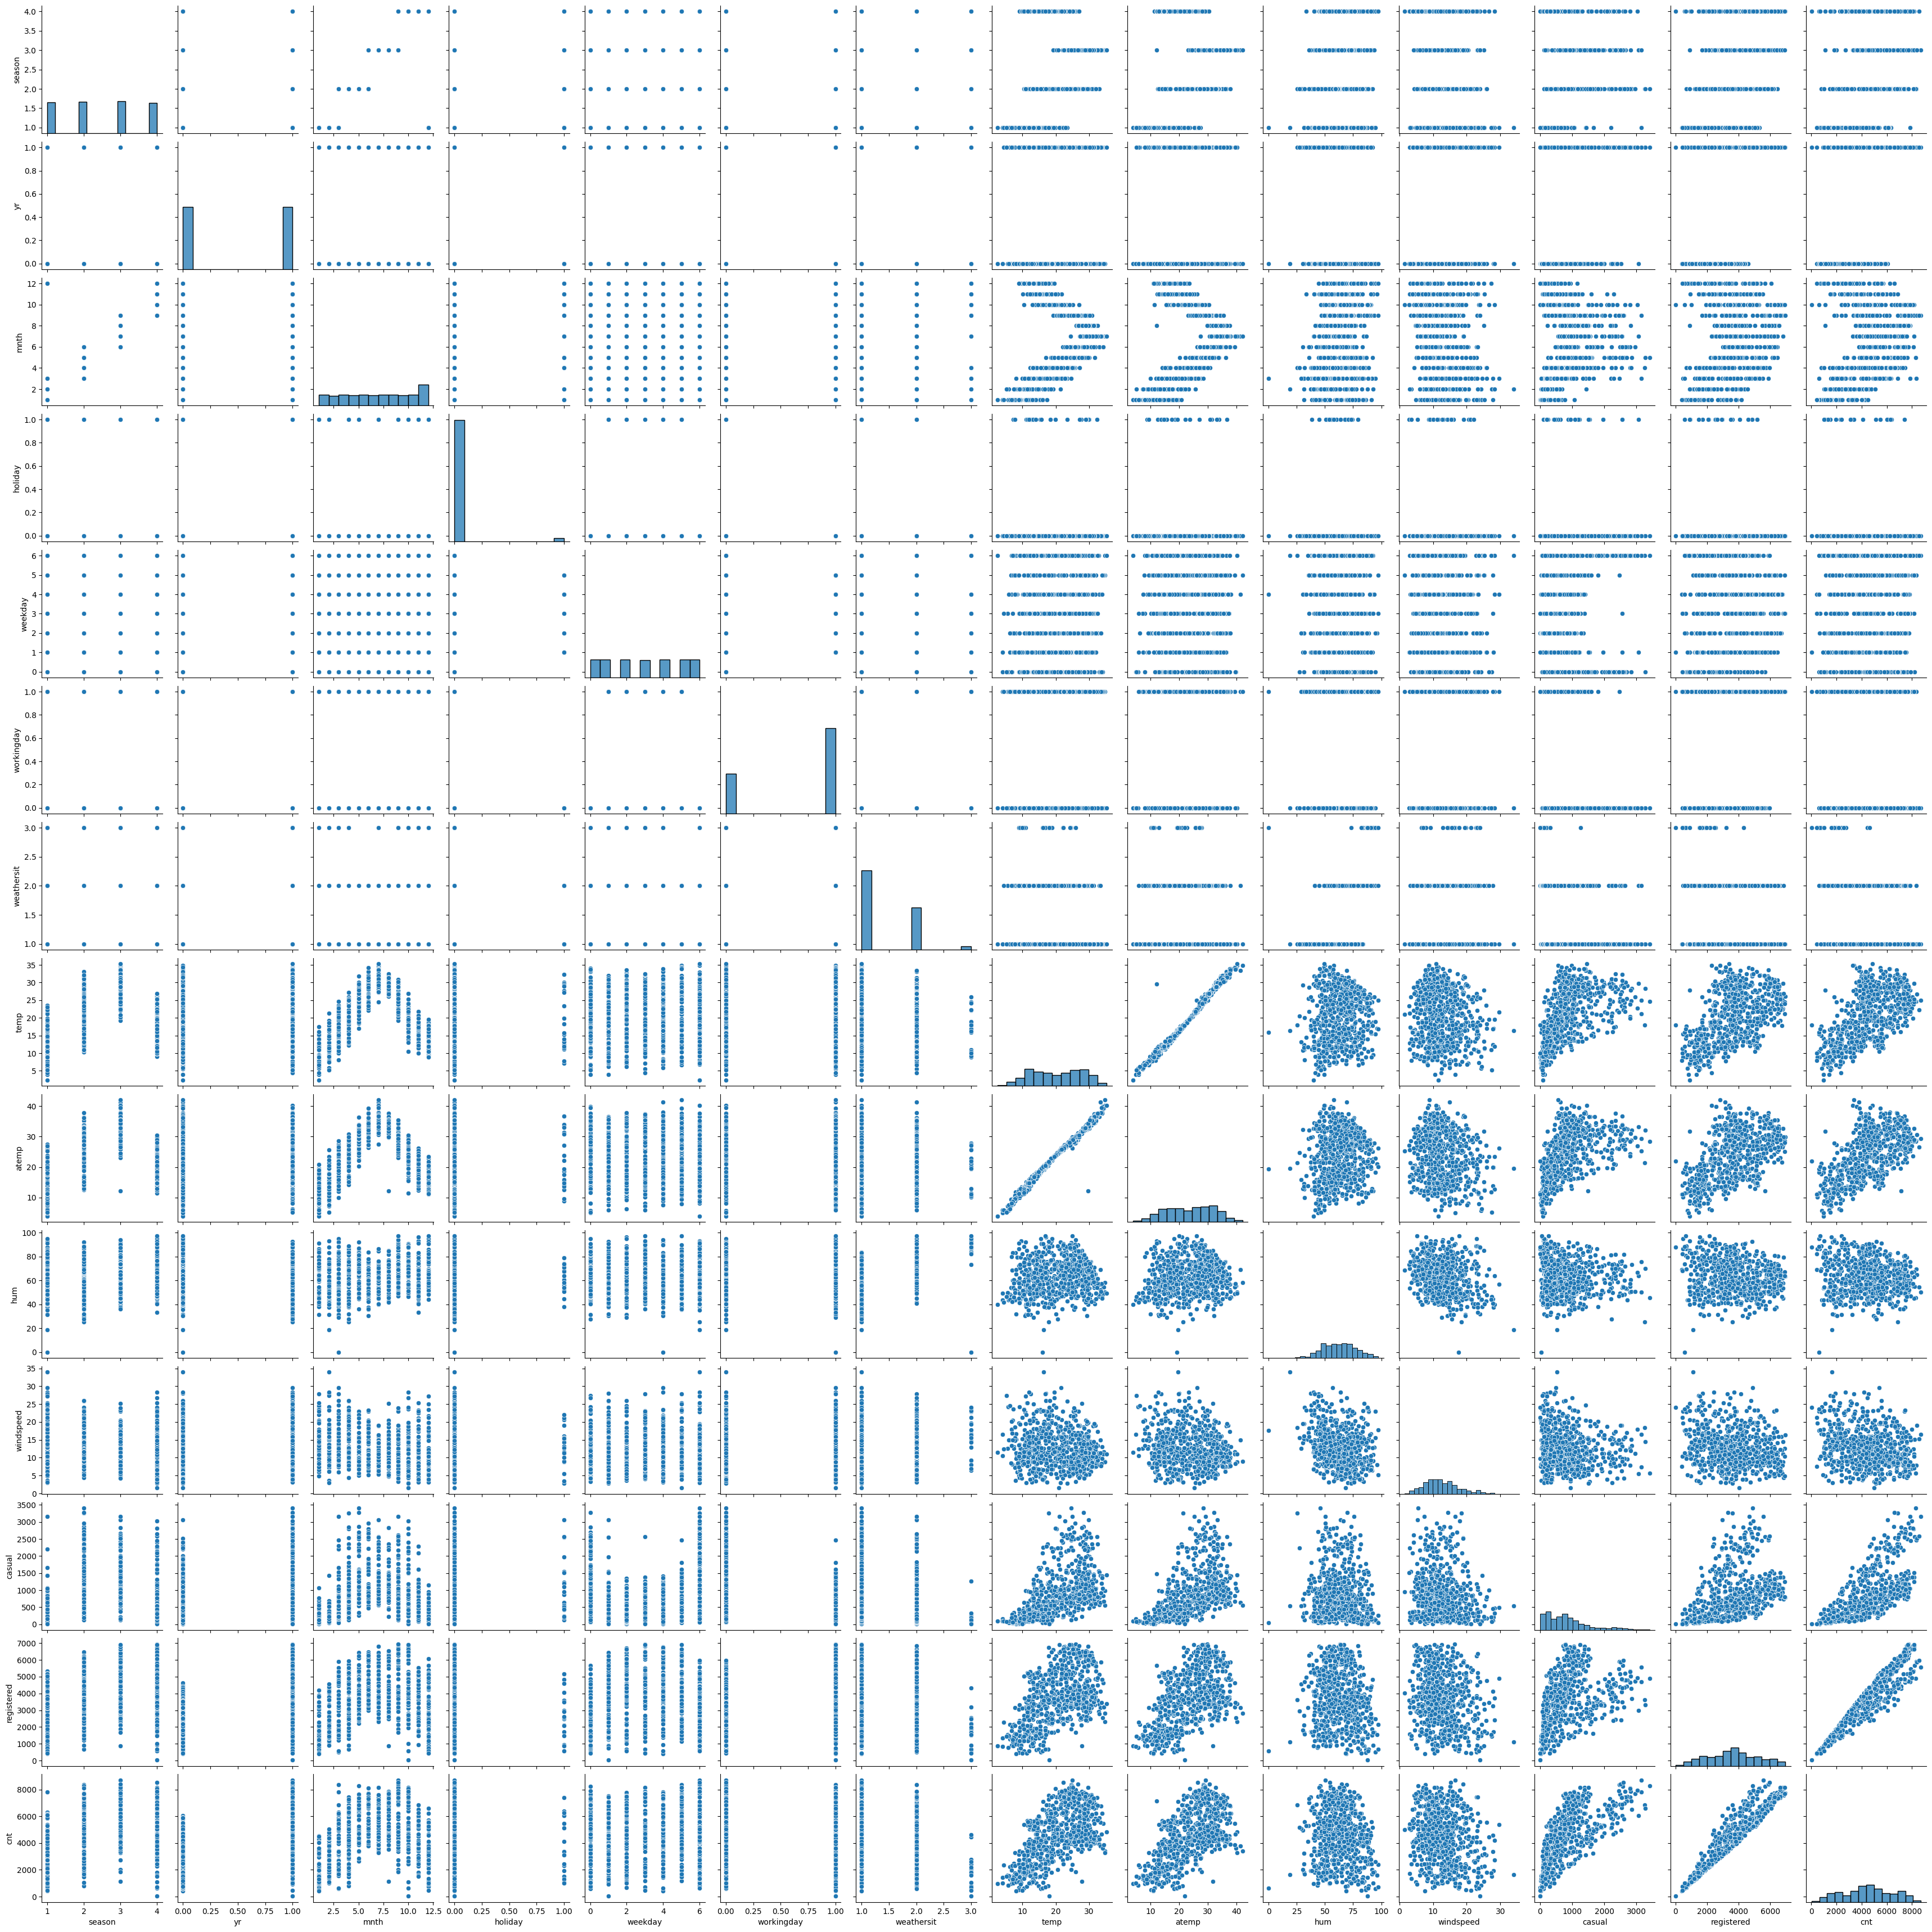

In [21]:
sns.pairplot(df)

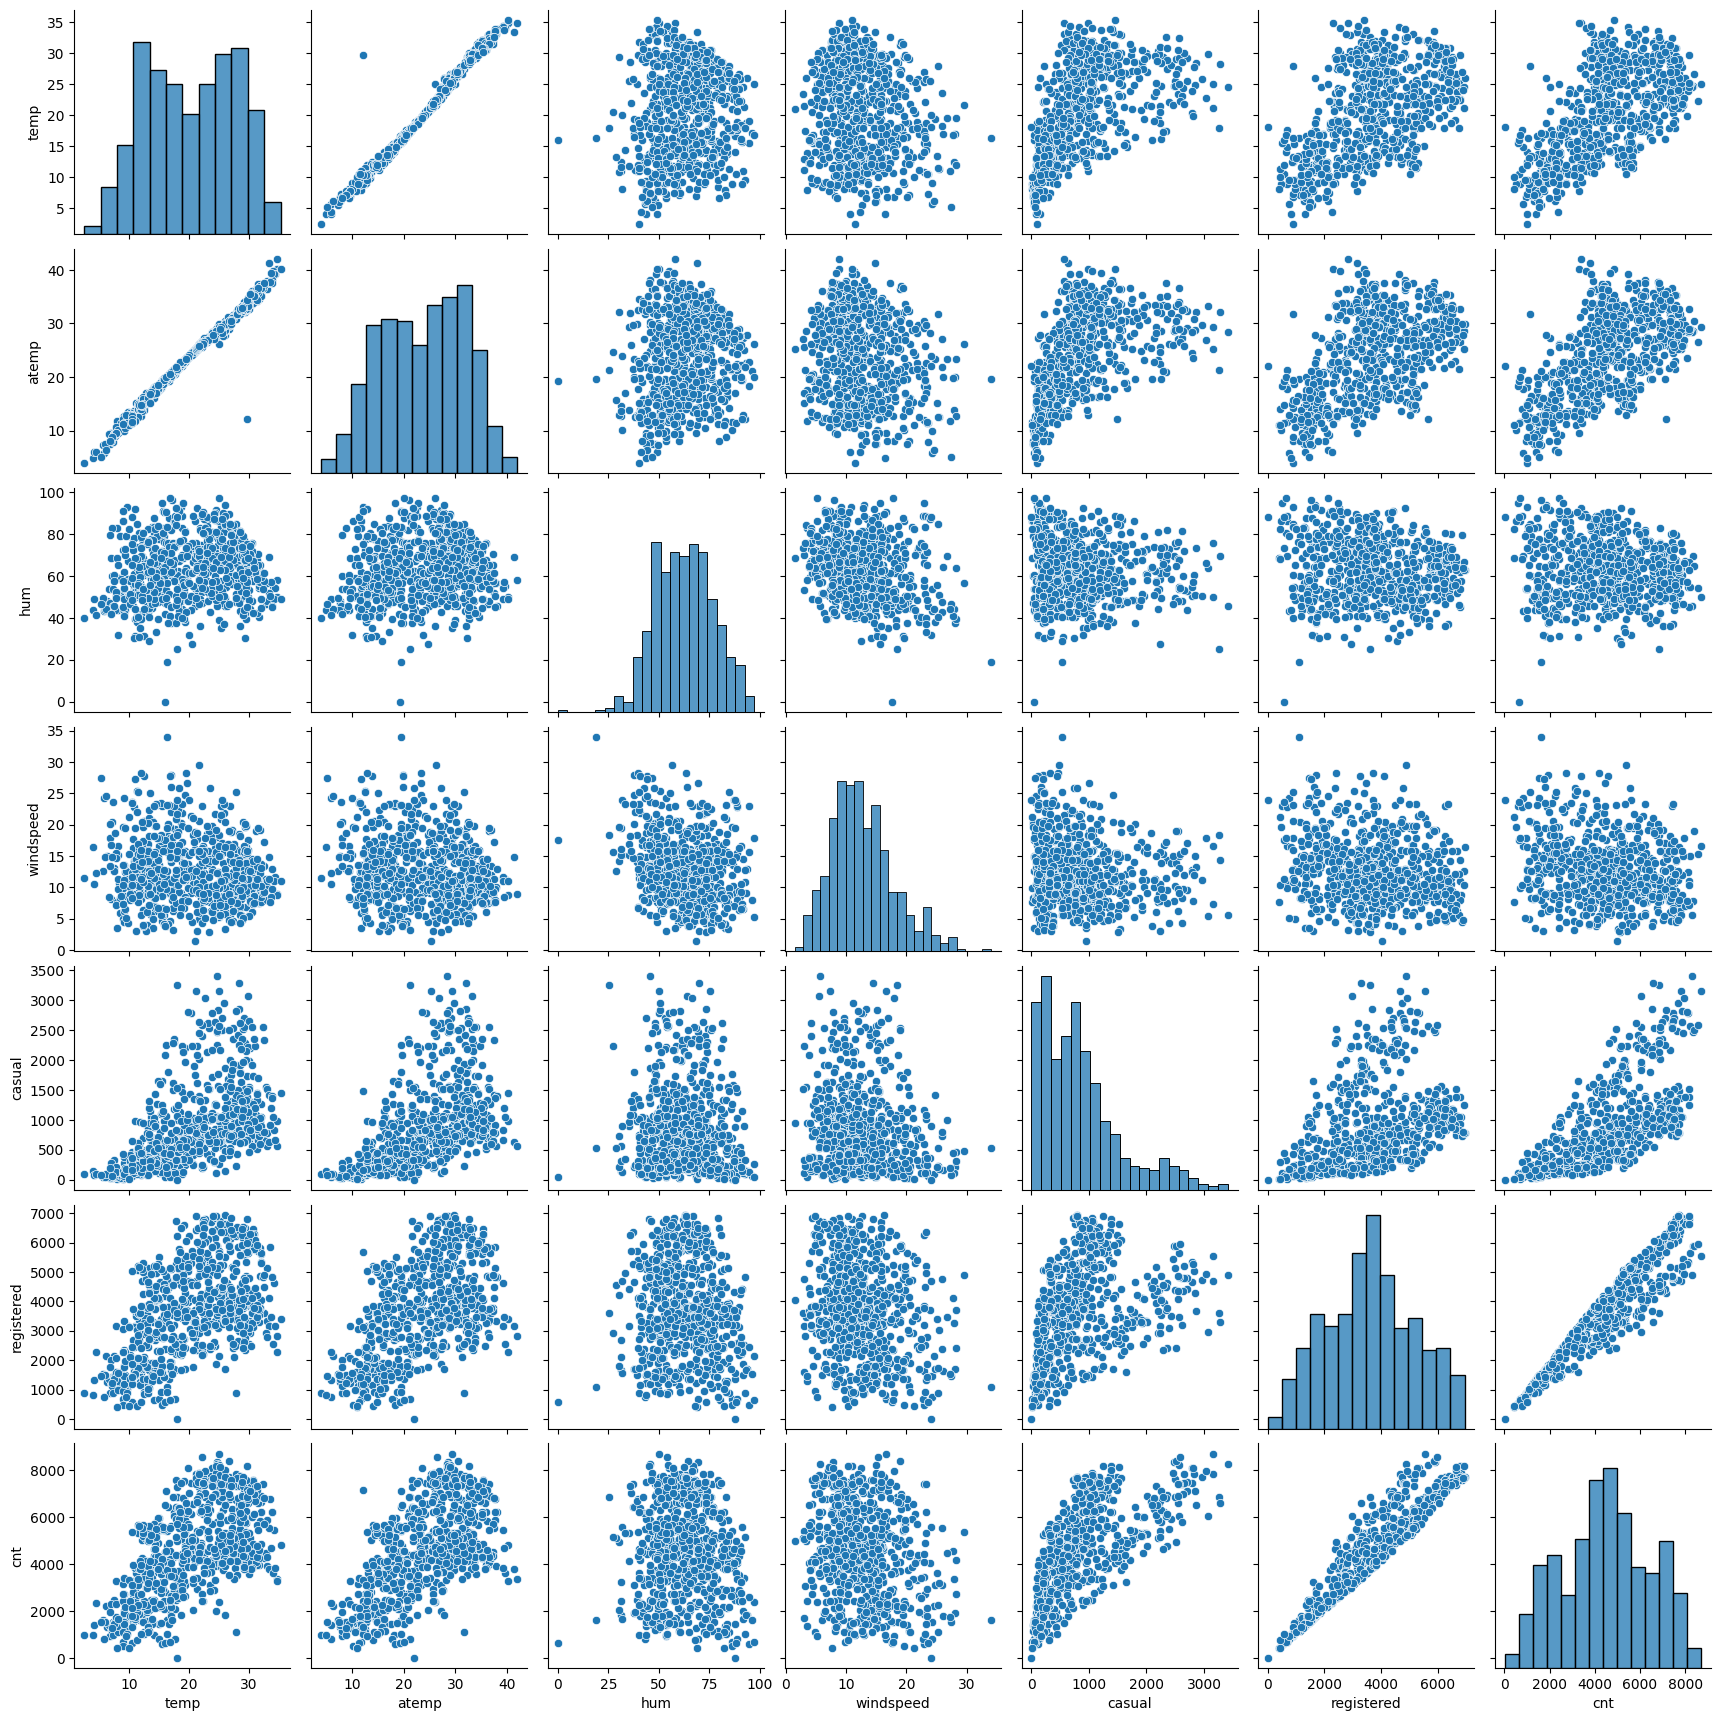

In [22]:
sns.pairplot(df[['temp', 'atemp', 'hum', 'windspeed', 'casual',
       'registered', 'cnt']])

<Axes: xlabel='mnth', ylabel='cnt'>

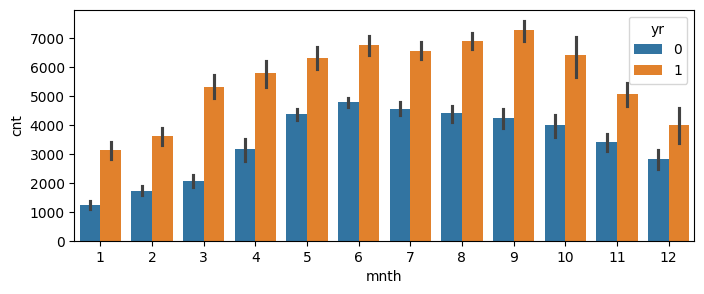

In [23]:
plt.figure(figsize = (8,3))
sns.barplot(data=df , x = 'mnth' , y = 'cnt' , hue = 'yr')

<Axes: xlabel='weekday', ylabel='cnt'>

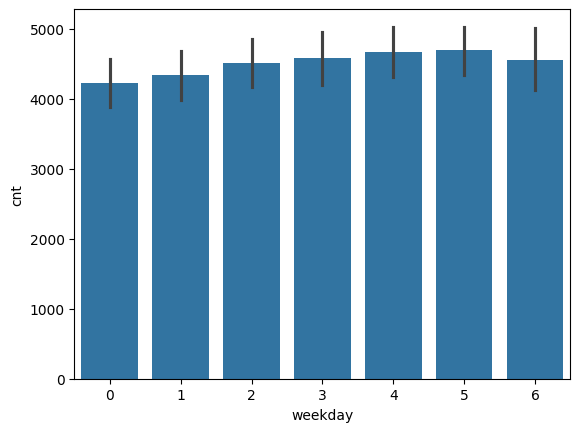

In [24]:
sns.barplot(df , x = 'weekday' , y = 'cnt')


In [70]:
#Removing registered and casual from the dataset as they are directly related to total count that we need to predict 
df.pop('casual')
df.pop('registered')

instant
1       654
2       670
3      1229
4      1454
5      1518
       ... 
726    1867
727    2451
728    1182
729    1432
730    2290
Name: registered, Length: 730, dtype: int64

In [71]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
instant,,,,,,,,,,,,
1,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
2,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
3,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
4,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
5,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


Model Building

In [136]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [98]:
df_train , df_test = train_test_split(df , train_size= 0.7 , random_state= 100)
print(df_train.shape)
print(df_test.shape)

(510, 12)
(220, 12)


In [99]:
df_train.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
instant,,,,,,,,,,,,
577,3,1,7,0,2,1,1,29.246653,33.1448,70.4167,11.083475,7216
427,1,1,3,0,6,0,2,16.980847,20.6746,62.1250,10.792293,4066
729,1,1,12,0,0,0,1,10.489153,11.5850,48.3333,23.500518,1796
483,2,1,4,0,6,0,2,15.443347,18.8752,48.9583,8.708325,4220
112,2,0,4,0,5,1,2,13.803347,16.0977,72.9583,14.707907,1683


In [100]:
#scaling the data

scaler = MinMaxScaler()
num_vars = ['season', 'mnth', 'weekday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']



df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
instant,,,,,,,,,,,,
577,0.666667,1,0.545455,0,0.333333,1,0.0,0.815169,0.766351,0.725633,0.264686,0.827658
427,0.000000,1,0.181818,0,1.000000,0,0.5,0.442393,0.438975,0.640189,0.255342,0.465255
729,0.000000,1,1.000000,0,0.000000,0,0.0,0.245101,0.200348,0.498067,0.663106,0.204096
483,0.333333,1,0.272727,0,1.000000,0,0.5,0.395666,0.391735,0.504508,0.188475,0.482973
112,0.333333,0,0.272727,0,0.833333,1,0.5,0.345824,0.318819,0.751824,0.380981,0.191095


In [101]:
df_train.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.504575,0.507843,0.503743,0.025490,0.498366,0.676471,0.201961,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.370078,0.500429,0.315038,0.157763,0.336182,0.468282,0.273944,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.000000,0.181818,0.000000,0.166667,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.666667,1.000000,0.545455,0.000000,0.500000,1.000000,0.000000,0.542596,0.529718,0.653714,0.296763,0.518638
75%,0.666667,1.000000,0.818182,0.000000,0.833333,1.000000,0.500000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


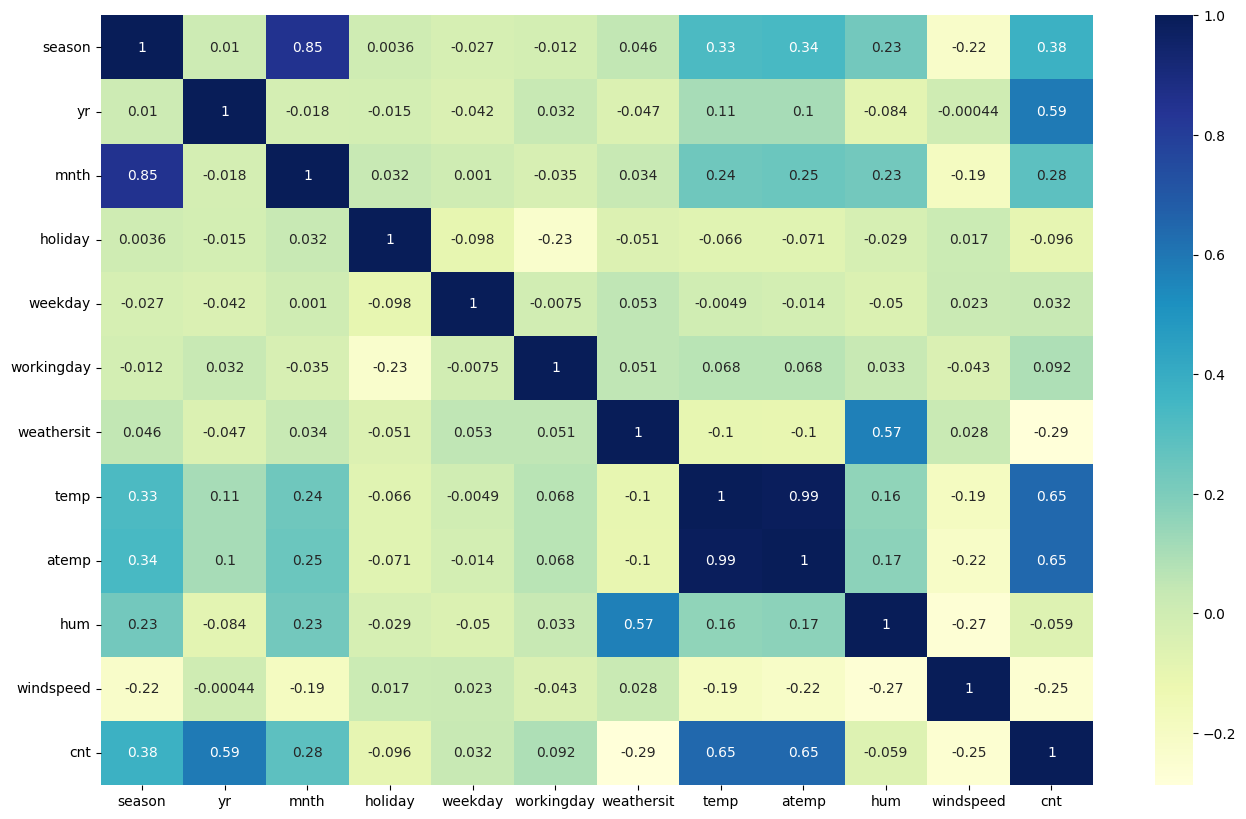

In [78]:
#ploating a heatmap to see the corelations 

plt.figure(figsize=(16,10))

sns.heatmap(df_train.corr() , annot= True, cmap = 'YlGnBu')
plt.show()

In [102]:
# x_train , y_train

y_train = df_train.pop('cnt')
x_train = df_train


In [117]:
x_train_sm = x_train[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed']]
x_train_sm = sm.add_constant(x_train_sm)

lr = sm.OLS(y_train, x_train_sm)

#fit

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     185.7
Date:                Wed, 02 Oct 2024   Prob (F-statistic):          2.86e-168
Time:                        15:05:38   Log-Likelihood:                 454.40
No. Observations:                 510   AIC:                            -884.8
Df Residuals:                     498   BIC:                            -834.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1818      0.032      5.672      0.000       0.119       0.245
season         0.1409      0.024      5.901      0.000       0.094       0.188
yr             0.2349      0.009     26.035      0.000       0.217       0.253
mnth          -0.0156      0.027     -0.570      0.569      -0.069       0.038
holiday       -0.0686      0.029     -2.341      0.020      -0.126      -0.011
weekday        0.0473      0.013      3.516      0.000       0.021       0.074
workingday     0.0194      0.010      1.974      0.049    9.27e-05       0.039
weathersit    -0.1581      0.021     -7.530      0.000      -0.199      -0.117
temp           0.2136      0.140      1.531      0.127      -0.061       0.488
atemp          0.2828      0.150      1.889      0.059      -0.011       0.577
hum           -0.0972      0.042     -2.341      0.020      -0.179      -0.016
windspeed     -0.1575      0.029     -5.477      0.000      -0.214      -0.101
==============================================================================
Omnibus:                       62.779   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.597
Skew:                          -0.662   Prob(JB):                     6.58e-32
Kurtosis:                       5.237   Cond. No.                         88.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [120]:

# Calculate VIF for each predictor
vif = pd.DataFrame()
vif['Variable'] = x_train_sm.columns
vif['VIF'] = [variance_inflation_factor(x_train_sm.values, i) for i in range(x_train_sm.shape[1])]
print(vif)

      Variable        VIF
0        const  51.901523
1       season   3.937000
2           yr   1.027909
3         mnth   3.741497
4      holiday   1.078828
5      weekday   1.033540
6   workingday   1.068951
7   weathersit   1.667938
8         temp  50.104016
9        atemp  51.021678
10         hum   1.850007
11   windspeed   1.202187


In [121]:
# Removeing temp first: Due to its high VIF and non-significance in your previous model analysis

x_train_sm = x_train[['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'atemp', 'hum', 'windspeed']]
x_train_sm = sm.add_constant(x_train_sm)

lr = sm.OLS(y_train, x_train_sm)

#fit

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     203.4
Date:                Wed, 02 Oct 2024   Prob (F-statistic):          6.26e-169
Time:                        15:33:39   Log-Likelihood:                 453.20
No. Observations:                 510   AIC:                            -884.4
Df Residuals:                     499   BIC:                            -837.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1790      0.032      5.588      0.000       0.116       0.242
season         0.1412      0.024      5.908      0.000       0.094       0.188
yr             0.2352      0.009     26.041      0.000       0.217       0.253
mnth          -0.0160      0.027     -0.585      0.559      -0.070       0.038
holiday       -0.0670      0.029     -2.284      0.023      -0.125      -0.009
weekday        0.0486      0.013      3.611      0.000       0.022       0.075
workingday     0.0197      0.010      1.997      0.046       0.000       0.039
weathersit    -0.1571      0.021     -7.479      0.000      -0.198      -0.116
atemp          0.5092      0.023     21.686      0.000       0.463       0.555
hum           -0.1002      0.042     -2.414      0.016      -0.182      -0.019
windspeed     -0.1506      0.028     -5.296      0.000      -0.206      -0.095
==============================================================================
Omnibus:                       64.718   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              155.353
Skew:                          -0.665   Prob(JB):                     1.84e-34
Kurtosis:                       5.354   Cond. No.                         22.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [122]:

# Calculate VIF for each predictor
vif = pd.DataFrame()
vif['Variable'] = x_train_sm.columns
vif['VIF'] = [variance_inflation_factor(x_train_sm.values, i) for i in range(x_train_sm.shape[1])]
print(vif)

      Variable        VIF
0        const  51.738912
1       season   3.936627
2           yr   1.027393
3         mnth   3.741069
4      holiday   1.077449
5      weekday   1.029685
6   workingday   1.068662
7   weathersit   1.666557
8        atemp   1.251229
9          hum   1.845794
10   windspeed   1.172446


In [123]:
# removing mnth as t is not statistically significant in your previous model analysis and has a moderate VIF of 3.74.

x_train_sm = x_train[['season', 'yr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'atemp', 'hum', 'windspeed']]
x_train_sm = sm.add_constant(x_train_sm)

lr = sm.OLS(y_train, x_train_sm)

#fit

lr_model = lr.fit()

lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     226.3
Date:                Wed, 02 Oct 2024   Prob (F-statistic):          4.80e-170
Time:                        15:44:04   Log-Likelihood:                 453.03
No. Observations:                 510   AIC:                            -886.1
Df Residuals:                     500   BIC:                            -843.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1778      0.032      5.565      0.000       0.115       0.241
season         0.1295      0.013      9.869      0.000       0.104       0.155
yr             0.2353      0.009     26.088      0.000       0.218       0.253
holiday       -0.0678      0.029     -2.315      0.021      -0.125      -0.010
weekday        0.0481      0.013      3.585      0.000       0.022       0.075
workingday     0.0198      0.010      2.014      0.045       0.000       0.039
weathersit    -0.1561      0.021     -7.461      0.000      -0.197      -0.115
atemp          0.5104      0.023     21.845      0.000       0.465       0.556
hum           -0.1028      0.041     -2.492      0.013      -0.184      -0.022
windspeed     -0.1507      0.028     -5.306      0.000      -0.207      -0.095
==============================================================================
Omnibus:                       63.967   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.102
Skew:                          -0.658   Prob(JB):                     5.68e-34
Kurtosis:                       5.339   Cond. No.                         21.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [124]:
vif = pd.DataFrame()
vif['Variable'] = x_train_sm.columns
vif['VIF'] = [variance_inflation_factor(x_train_sm.values, i) for i in range(x_train_sm.shape[1])]
print(vif)

     Variable        VIF
0       const  51.525020
1      season   1.188598
2          yr   1.026453
3     holiday   1.075235
4     weekday   1.026024
5  workingday   1.067965
6  weathersit   1.655628
7       atemp   1.240753
8         hum   1.824863
9   windspeed   1.172316


In [126]:
#removing workingday just to see if we can simplefy our model

x_train_sm = x_train[['season', 'yr', 'holiday', 'weekday',
       'weathersit', 'atemp', 'hum', 'windspeed']]
x_train_sm = sm.add_constant(x_train_sm)

lr = sm.OLS(y_train, x_train_sm)

#fit

lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     252.5
Date:                Wed, 02 Oct 2024   Prob (F-statistic):          2.19e-170
Time:                        15:55:04   Log-Likelihood:                 450.97
No. Observations:                 510   AIC:                            -883.9
Df Residuals:                     501   BIC:                            -845.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1921      0.031      6.148      0.000       0.131       0.254
season         0.1285      0.013      9.768      0.000       0.103       0.154
yr             0.2357      0.009     26.060      0.000       0.218       0.254
holiday       -0.0812      0.029     -2.840      0.005      -0.137      -0.025
weekday        0.0472      0.013      3.509      0.000       0.021       0.074
weathersit    -0.1540      0.021     -7.344      0.000      -0.195      -0.113
atemp          0.5133      0.023     21.940      0.000       0.467       0.559
hum           -0.1043      0.041     -2.520      0.012      -0.186      -0.023
windspeed     -0.1530      0.028     -5.372      0.000      -0.209      -0.097
==============================================================================
Omnibus:                       69.519   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.368
Skew:                          -0.729   Prob(JB):                     4.08e-35
Kurtosis:                       5.308   Cond. No.                         19.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [127]:
vif = pd.DataFrame()
vif['Variable'] = x_train_sm.columns
vif['VIF'] = [variance_inflation_factor(x_train_sm.values, i) for i in range(x_train_sm.shape[1])]
print(vif)


     Variable        VIF
0       const  48.985543
1      season   1.186808
2          yr   1.025950
3     holiday   1.019392
4     weekday   1.024872
5  weathersit   1.651146
6       atemp   1.236250
7         hum   1.824284
8   windspeed   1.170530


In [128]:
y_train_pred = lr_model.predict(x_train_sm)
y_train_pred

instant
577    0.806439
427    0.517574
729    0.377294
483    0.560548
112    0.224262
         ...   
579    0.868610
54     0.265491
351    0.279270
80     0.228304
521    0.589561
Length: 510, dtype: float64

<Axes: ylabel='Density'>

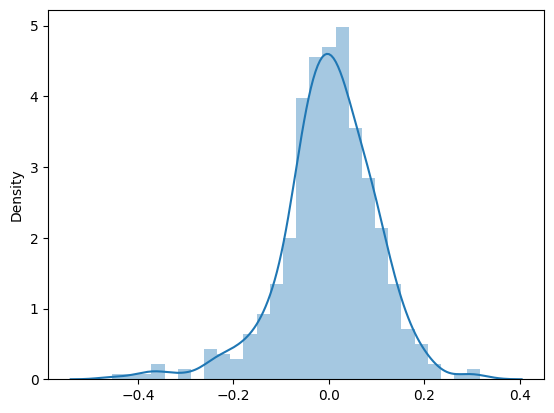

In [131]:
res = y_train - y_train_pred
sns.distplot(res)

Making prediction on test set

In [132]:
num_vars = ['season', 'mnth', 'weekday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']


df_test[num_vars] = scaler.transform(df_test[num_vars])

df_test.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
instant,,,,,,,,,,,,
185,0.666667,0,0.545455,1,0.166667,0,0.5,0.831783,0.769660,0.657364,0.084219,0.692706
536,0.333333,1,0.454545,0,0.500000,1,0.0,0.901354,0.842587,0.610133,0.153728,0.712034
300,1.000000,0,0.818182,0,0.666667,1,0.5,0.511964,0.496145,0.837699,0.334206,0.303382
222,0.666667,0,0.636364,0,0.500000,1,0.0,0.881625,0.795343,0.437098,0.339570,0.547400
153,0.333333,0,0.454545,0,0.666667,1,0.0,0.817246,0.741471,0.314298,0.537414,0.569029


In [134]:
df_test.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.487879,0.481818,0.499174,0.036364,0.502273,0.700000,0.186364,0.558718,0.532847,0.638221,0.313293,0.522154
std,0.370602,0.500809,0.311120,0.187620,0.330843,0.459303,0.269102,0.233187,0.217401,0.148694,0.159584,0.219163
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.272727,0.000000,0.166667,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595
50%,0.333333,0.000000,0.454545,0.000000,0.500000,1.000000,0.000000,0.558172,0.544652,0.625590,0.300126,0.524678
75%,0.666667,1.000000,0.727273,0.000000,0.833333,1.000000,0.500000,0.755981,0.713308,0.743798,0.402718,0.677750
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


In [135]:

y_test = df_test.pop('cnt')
x_test = df_test

x_test_sm = x_test[['season', 'yr', 'holiday', 'weekday',
       'weathersit', 'atemp', 'hum', 'windspeed']]
x_test_sm = sm.add_constant(x_test_sm)

y_test_pred = lr_model.predict(x_test_sm)
y_test_pred

instant
185    0.441043
536    0.839625
300    0.391283
222    0.612095
153    0.532021
         ...   
703    0.712634
128    0.452774
641    0.760097
73     0.285857
654    0.723299
Length: 220, dtype: float64

In [137]:
r2_score(y_true= y_test , y_pred= y_test_pred)

0.7869900106090753

<Axes: ylabel='Density'>

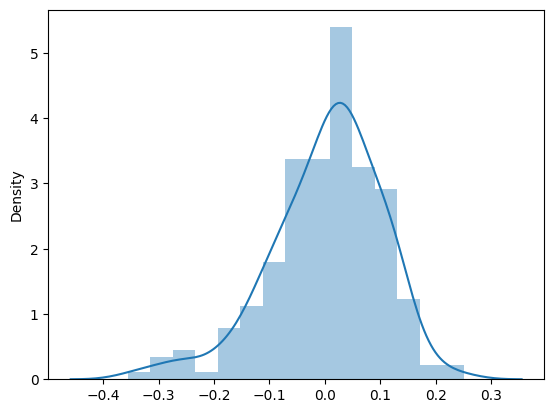

In [138]:
res_test = y_test - y_test_pred
sns.distplot(res_test)